# Introduction

One of the most important skills to develop as a data scientist is the ability to communicate results. The best way to communicate this knowledge is not with code or comments, but with graphics that clearly show what is happening in the business.

When done correctly, data visualization aims to summarize important trends and patterns in your dataset, allowing to communicate key points from the analysis.

[Seaborn] (https://seaborn.pydata.org/examples/index.html) is a library created specifically for the purpose of visualizing data.
The dataset we will use contains information on 1,338 insurance beneficiaries living in the United States and the charge they pay for their health insurance.

This notebook will reflect the main charts of Seaborn. Later we will learn to integrate those charts in Power BI Desktop.

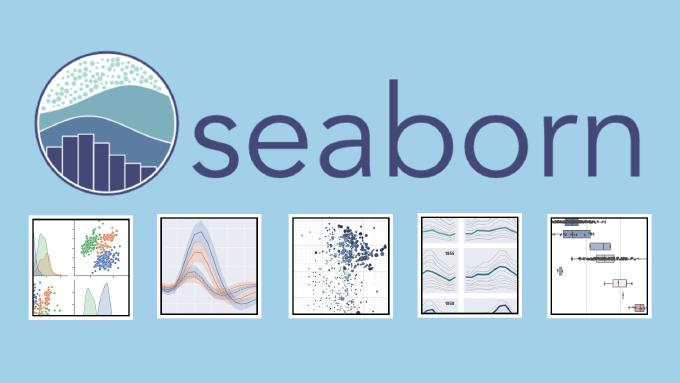

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read data

In [3]:
data = pd.read_csv("Data\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
print("Shape of dataframe: ", data.shape)

Shape of dataframe:  (1338, 7)


# 3. Description of the data

Below is the description of the dataset columns:

- Age: Age of the beneficiary
- Sex: gender of the beneficiary
- BMI: body mass index
- Children: number of children (dependents) covered by health insurance
- Smoker: smoking status
- Region: the beneficiary's residential area in the United States
- Charges: individual medical costs billed by health insurance

# 4. Missing Values, Data Types, and Summary Statistics

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [101]:
# Missing data

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay valores perdidos

In [102]:
# Data types

data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [103]:
# Data type value counts

data.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

In [104]:
# Summary statistics

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# 5. Feature Engineering

Feature engineering is the process of creating new features using existing features in the data set. In this section, I'll create 2 new varaibles:

- age_category
- weight_condition


In [105]:
# Age category

data.loc[(data['age'] >= 18) & (data['age'] < 36), 'age_category'] = 'youth'
data.loc[(data['age'] >= 36) & (data['age'] <= 55), 'age_category'] = 'adults'
data.loc[data['age'] > 55, 'age_category'] = 'seniors'
data['age_category'].value_counts()

youth      574
adults     548
seniors    216
Name: age_category, dtype: int64

In [106]:
# Weight condition

data.loc[data['bmi'] < 18.5, 'weight_condition'] = 'underweight'
data.loc[(data['bmi'] >= 18.5) & (data['bmi'] < 25), 'weight_condition'] = 'normal weight'
data.loc[(data['bmi'] >= 25) & (data['bmi'] < 30), 'weight_condition'] = 'overweight'
data.loc[data['bmi'] >= 30, 'weight_condition'] = 'obese'
data['weight_condition'].value_counts()

obese            707
overweight       386
normal weight    225
underweight       20
Name: weight_condition, dtype: int64

In [107]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_category,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,youth,overweight
1,18,male,33.770,1,no,southeast,1725.55230,youth,obese
2,28,male,33.000,3,no,southeast,4449.46200,youth,obese
3,33,male,22.705,0,no,northwest,21984.47061,youth,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,youth,overweight


In [108]:
# Missing data

data.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region              0
charges             0
age_category        0
weight_condition    0
dtype: int64

In [109]:
# Data types 

data.dtypes

age                   int64
sex                  object
bmi                 float64
children              int64
smoker               object
region               object
charges             float64
age_category         object
weight_condition     object
dtype: object

In [110]:
# Data type value counts

data.dtypes.value_counts()

object     5
int64      2
float64    2
dtype: int64

# 6. Visualize the distribution

Before visualizing the features in our data set, it is always a good practice to first categorize these features as categorical or numeric. This is because the values ​​of a categorical variable are discrete, while the values ​​of a numeric variable are continuous. Therefore, they will require different graphics to be able to visualize them in a meaningful way.

In this section, we will look at the different charts that are available in Seaborn to visualize both categorical and numeric variables.

For categorical variables, we have:
- sns.countplot
- sns.catplot (formerly sns.factorplot)

For numeric variables, we have:
- sns.boxplot
- sns.distplot
- sns.kdeplot

## 6.1 Categorical Variables



## 6.1.1 sns.countplot

Countplot simply shows the count of each value in a column.

In [111]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5,1,'Sex Value Counts')

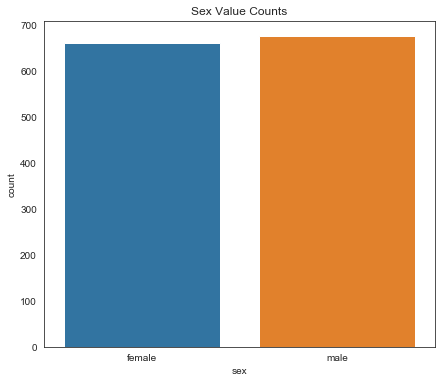

In [112]:
plt.figure(figsize = (7, 6))

sns.countplot(data['sex'])

plt.title('Sex Value Counts')

In [113]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5,1,'Smoker Value Counts')

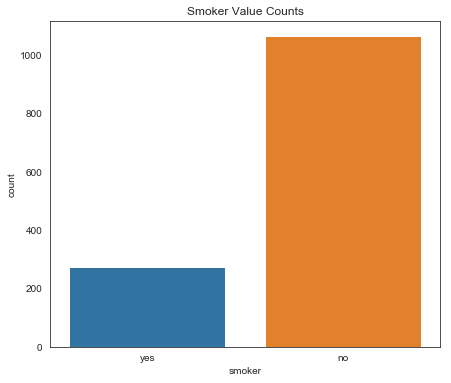

In [114]:
plt.figure(figsize = (7, 6))
sns.countplot(data['smoker'])
plt.title('Smoker Value Counts')

In [115]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## 6.1.2 sns.catplot (formerly sns.factorplot)

Catplot allows us to further break down a categorical variable using another categorical variable.

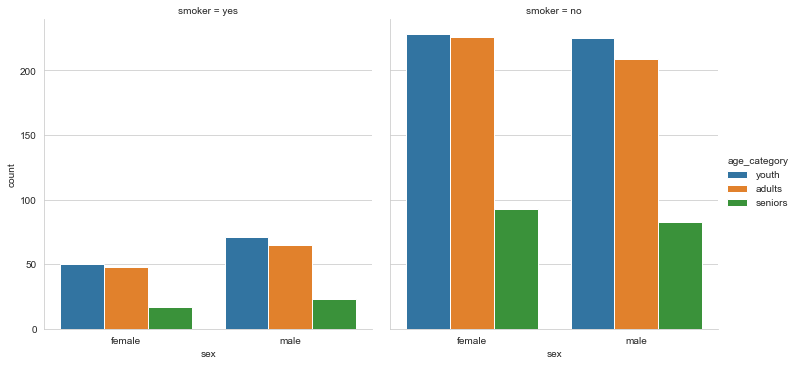

In [116]:
sns.set_style('whitegrid')

sns.catplot('sex', col = 'smoker', hue = 'age_category', data = data, kind = 'count')

Here, I have divided the population by sex, smoking status, and age category.

As we can see in the graph, there are more male smokers than female smokers. Most of the smokers belong to the age category of youth and adults.

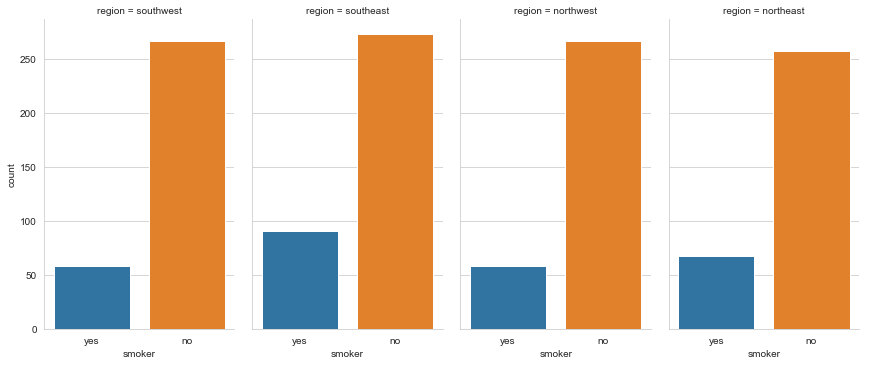

In [117]:

sns.catplot(x = 'smoker', col = 'region', data = data, kind = 'count', aspect = 0.6)

The southeast region has the highest number of smokers.

## 6.2 Numerical Variables


## 6.2.1 sns.boxplot

Boxplot is one of the most common graphs in statistics. Gives an overview of the distribution of a continuous variable.

Text(0.5,1,'Charges by Smoking Habits')

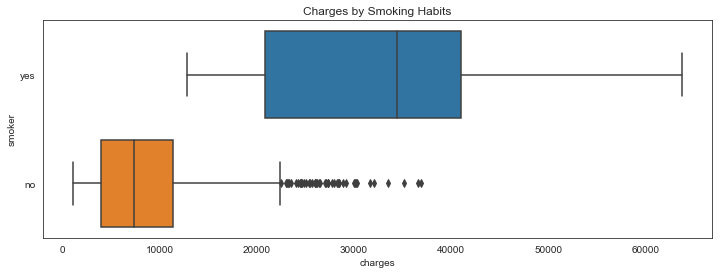

In [118]:
sns.set_style('white')
plt.figure(figsize = (12, 4))

sns.boxplot(y = data['smoker'], x = data['charges'])

plt.title('Charges by Smoking Habits')

Unsurprisingly, smokers pay a higher premium than non-smokers.

Text(0.5,1,'Charges by Age Category')

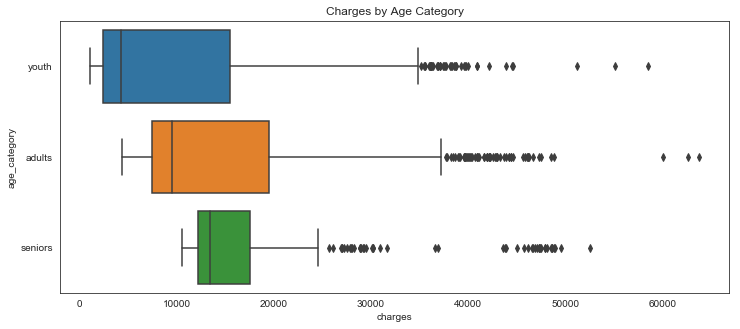

In [119]:
sns.set_style('white')
plt.figure(figsize = (12, 5))

sns.boxplot(y = data['age_category'], x = data['charges'])
plt.title('Charges by Age Category')

People pay more for health insurance as they get older.

## 6.2.2 sns.distplot

Distplot combines a histogram with kernel density smoothing to illustrate the distribution of a continuous variable.

Text(0.5,1,'BMI Distribution')

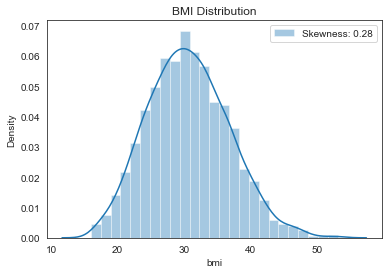

In [120]:
sns.set_style('white')

sns.distplot(data['bmi'], label = 'Skewness: %.2f'%(data['bmi'].skew()))

plt.legend(loc = 'best')
plt.title('BMI Distribution')

## 6.2.3 sns.kdeplot

In statistics, kernel distribution estimation is a non-parametric way of estimating the pdf of a continuous random variable.

Text(0.5,1,'Charges by Gender')

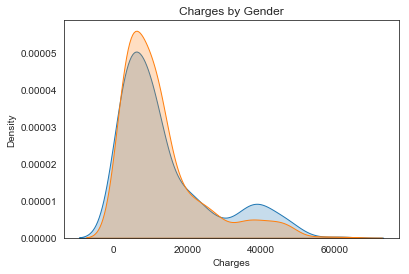

In [123]:
sns.set_style('white')

sns.kdeplot(data.loc[data['sex'] == 'male', 'charges'], label = 'Male', shade = True)
sns.kdeplot(data.loc[data['sex'] == 'female', 'charges'], label = 'Female', shade = True)

plt.xlabel('Charges')
plt.title('Charges by Gender')

Women pay higher premiums than men. This could be due to the fact that there are more men who smoke than women.

Text(0.5,1,'Charges by Age Category')

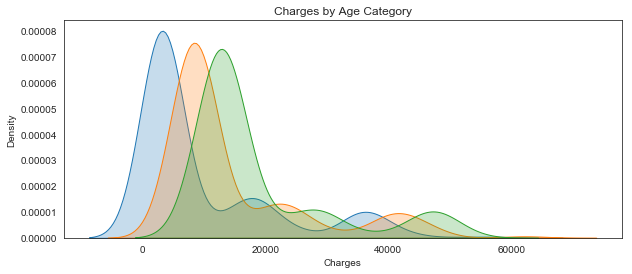

In [124]:
plt.figure(figsize = (10, 4))
sns.kdeplot(data.loc[data['age_category'] == 'youth', 'charges'], label = 'Youth', shade = True)
sns.kdeplot(data.loc[data['age_category'] == 'adults', 'charges'], label = 'Adults', shade = True)
sns.kdeplot(data.loc[data['age_category'] == 'seniors', 'charges'], label = 'Seniors', shade = True)
plt.xlabel('Charges')
plt.title('Charges by Age Category')

As we have seen previously, the cost of health insurance increases with age.

# 7. Visualize relationships

- sns.heatmap
- sns.barplot
- sns.jointplot
- sns.scatterplot
- sns.regplot
- sns.lmplot
- sns.swarmplot
- sns.violinplot
- sns.pointplot
- sns.pairplot

## 7.1 sns.heatmap

The heat map is one of the easiest ways to analyze the correlation between numerical variables. A positive correlation implies that two variables move in the same direction. Conversely, a negative correlation implies that two variables move in the opposite direction.

Text(0.5,1,'Correlation Between Numerical Variables')

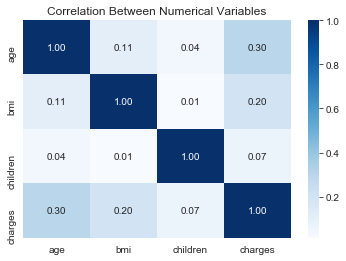

In [125]:
correlation = data[['age', 'bmi', 'children', 'charges']].corr()

sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Between Numerical Variables')

In [126]:
correlation['charges'].sort_values(ascending = False).drop('charges')

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

## 7.2 sns.barplot

The bar chart represents an estimate of the central tendency of a numeric variable with the height of each rectangle. In addition, it also indicates the uncertainty around that estimate using error bars.

Text(0.5,1,'Charges by Region')

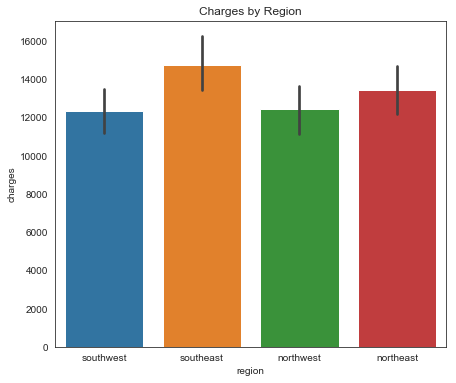

In [127]:
sns.set_style('white')
plt.figure(figsize = (7, 6))

sns.barplot(x = 'region', y = 'charges', data = data)

plt.title('Charges by Region')

The Southeast region pays the highest premium. This could be due to the fact that the region has the highest number of smokers as we have seen above.

## 7.3 sns.jointplot

Jointplot shows where data points lie between two different numeric variables.

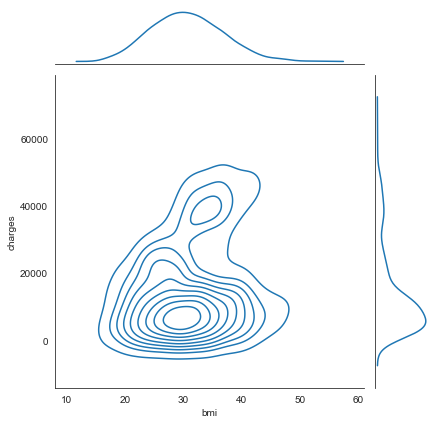

In [128]:
sns.jointplot(x = 'bmi', y = 'charges', data = data, kind = 'kde')

## 7.4 sns.scatterplot

The scatterplot also shows the location of data points between two separate numeric variables. It's also a great way to visualize and detect outliers in your data set.

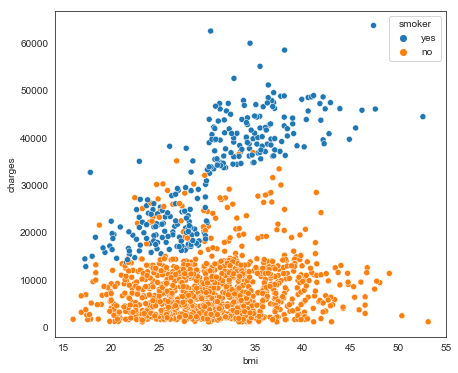

In [129]:
plt.figure(figsize = (7, 6))
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

## 7.5 Regplot

Regplot plots the data and adds a linear regression model fit.

Text(0.5,1,'Charges Against BMI')

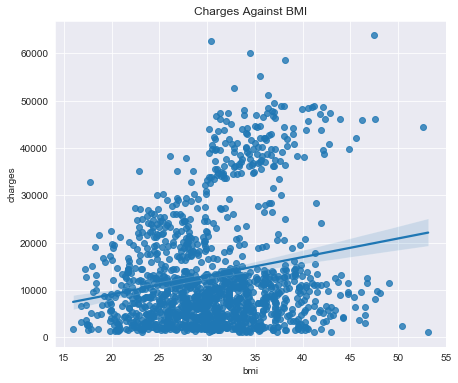

In [132]:
sns.set_style('darkgrid')
plt.figure(figsize = (7, 6))

sns.regplot(x = 'bmi', y = 'charges', data = data)
plt.title('Charges Against BMI')

The linear line has a positive slope, which suggests that there is a positive relationship between bmi and charges.

## 7.6 lmplot

lmplot is similar to regplot but offers the ability to categorize data points into different groups.

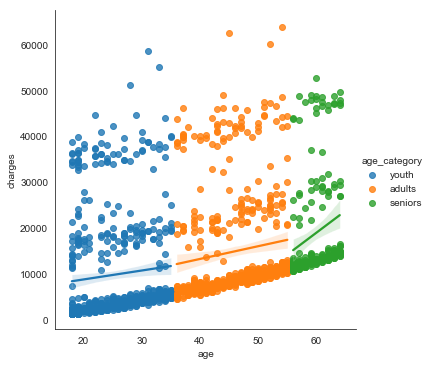

In [133]:
sns.set_style('white')
sns.lmplot(x = 'age', y = 'charges', hue = 'age_category', data = data)

Here, I used an lmplot to visualize charges against age and further categorized the data points by age category.

There is a positive relationship between age and positions. Older people have a much steeper increase due to higher risks of health complications at later ages.

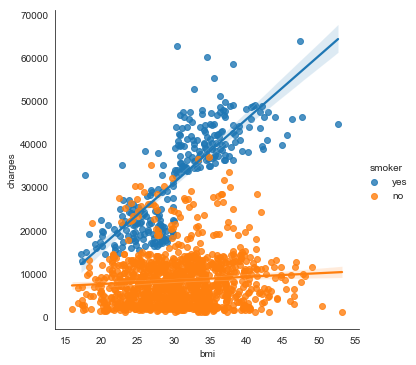

In [134]:
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

Here's another example where I've plotted burden against BMI and grouped the data points by smoking status.

Again, we see the positive relationship between BMI and charges, but a dramatically steeper increase for smokers compared to non-smokers. We can conclude that smoking significantly raises the levels of health insurance premiums.

## 7.7 sns.swarmplot

Swarmplot draws a categorical scatterplot with points that do not overlap.

Text(0.5,1,'Charges by Smoking Habits')

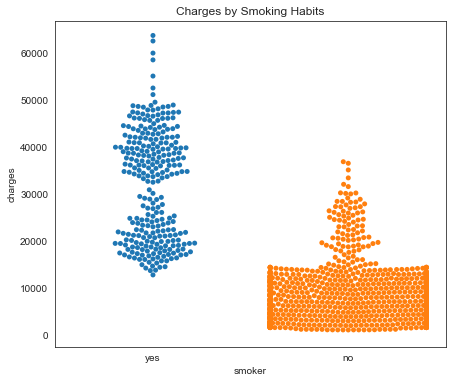

In [135]:
sns.set_style('white')
plt.figure(figsize = (7, 6))

sns.swarmplot(x = data['smoker'], y = data['charges'])
plt.title('Charges by Smoking Habits')

## 7.8 sns.violinplot

Violinplot draws a combination of boxplot and grain density estimation.

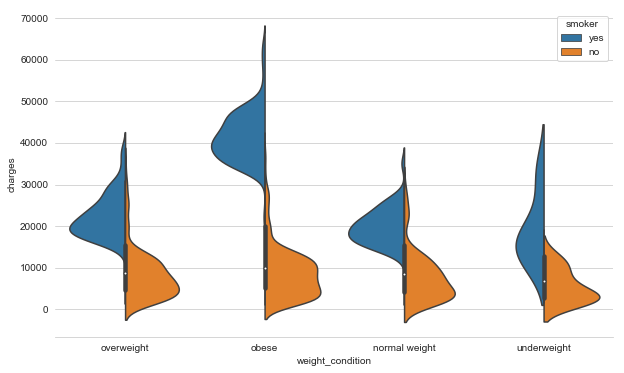

In [136]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.violinplot(x = 'weight_condition', y = 'charges', hue = 'smoker', data = data, split = True)
sns.despine(left = True)

## 7.9 sns.pointplot

The dotplot represents an estimate of the central tendency of a numeric variable by the position of the dots in the scatterplot. It also provides some indication of the uncertainty around that estimate using error bars.

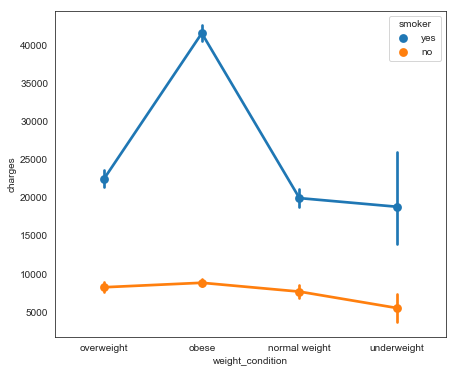

In [137]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.pointplot(x = 'weight_condition', y = 'charges', hue = 'smoker', data = data)

Obese smokers pay a significantly higher premium.

## 7.10 sns.pairplot

Pairplot plots pairwise relationships between numeric variables in the data set.

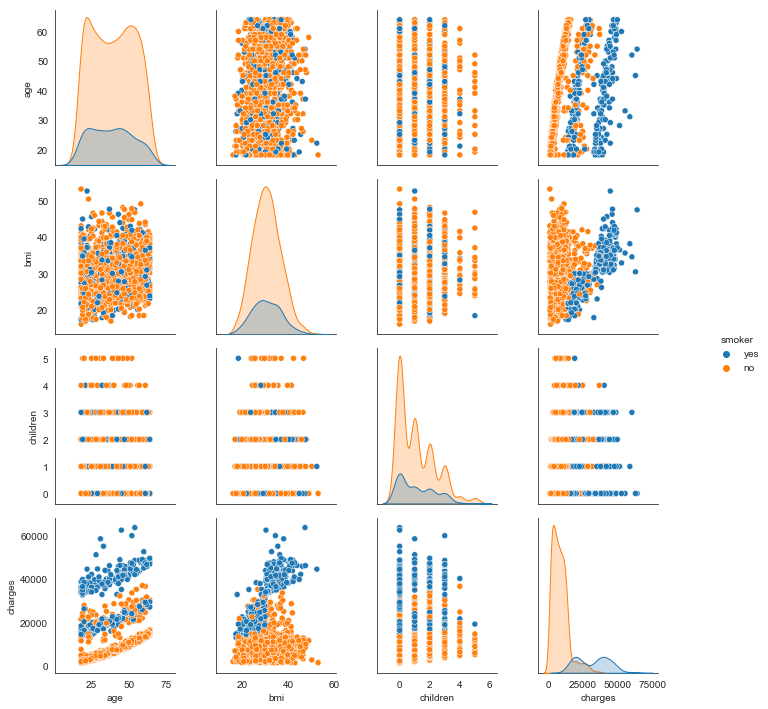

In [138]:
sns.pairplot(data, hue = 'smoker')